# Physics Lab 2

Determining the capacitance of a capacitor.

----------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Measurements

Aluminium sheets: 12.2cm x 44.0cm

Waxpaper thickness: 0.04mm $\pm$ 0.01mm

$C = \epsilon _{r} * \epsilon _{0} * \frac{A}{d}$

Probs spent too much time doing this formula

In [2]:
e_r = 10
e_0 = 8.85e-12
A = 0.122 * 0.44
d = 0.04e-3

C = e_r*e_0*A/d
C #118.8 nF

1.1876700000000001e-07

R = 14.74 $k\Omega$

Uncertainty Info:
http://www.peakelec.co.uk/acatalog/jz_lcr40.html

In [3]:
data = pd.read_csv("editedData.CSV")
t = data["A"]
v = data["B"]
data.head()

,A,B
0,-0.001080,-0.78
1,-0.001076,-0.78
2,-0.001072,-0.78
3,-0.001068,-0.76
4,-0.001064,-0.76


## Uncertainty Analysis for Calculation based Measurement


In [17]:
import math

# Area analog measurement
u_A = 1e-3/(2*math.sqrt(6))

# Waxpaper thickness digital measurement
u_d = 0.01e-3/(2*math.sqrt(3))

#Total Uncertainty of Area
t_u_A = A*math.sqrt(((u_A/0.122)**2+(u_A/0.44)**2))

# Combined Uncertainty of Capacitance
u_C = C*(math.sqrt((t_u_A/A)**2+(-1*u_d/d)**2))
u_C


8.573750146718729e-09

$C = 118.8 \pm 8.6 nF$

## Uncertainty Analysis for Direct Measurement

In [5]:
C_meas = 51.70e-9

#Instrument is rated at 1.5% accuracy for our range of capacitances
u_C_meas = C_meas*1.5/100
u_C_meas

7.755000000000001e-10

## Indirect Measurement Using RC Circuit

<IPython.core.display.Javascript object>


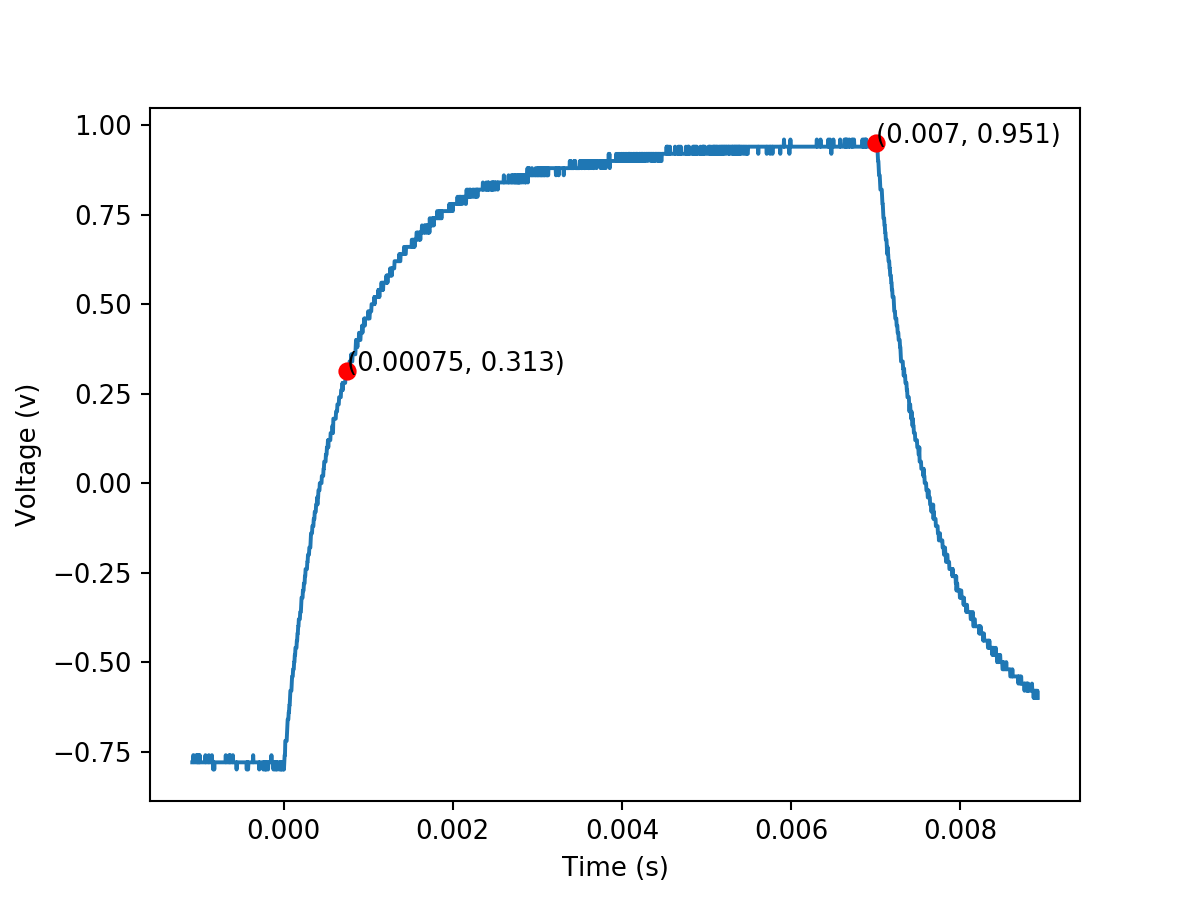

In [6]:
%matplotlib notebook
ax = plt.subplot()
ax.plot(t,v)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (v)")
x = np.array([0.007,0.00075])
a = 0.3136#0.632*0.951+0.632*0.781-0.781
y = np.array([0.951,a])
ax.plot(x,y,"ro")
ax.text(0.00075,a,"(0.00075, 0.313)")
ax.text(0.007,0.951,"(0.007, 0.951)")

In [13]:
R = 14.74e3

#Instrument is rated at 1% accuracy for our range of resistance
u_R = R*1/100

#Read off V_saturation from graph
V_sat = 0.951

#t value from graph
t = 0.00075

#Read-Off uncertainty in taking measurement
u_t = 0.00002/(2*math.sqrt(3))

C_ind_meas = t/(-1*R*math.log(1-0.632))
# C_ind_meas
u_R

147.4

In [10]:
u_C_ind_meas = C_ind_meas*math.sqrt((u_t/t)**2+(-1*u_R/R)**2)
u_C_ind_meas

6.42330359812444e-10

Indirect measurement of $C = 88.9 \pm 0.97 nF$